# setup

In [1]:
from __future__ import division, print_function, unicode_literals 
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
#import lightgbm as lgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from catboost import Pool
from catboost import CatBoostClassifier
import ipywidgets

%matplotlib inline

In [2]:
# import training data
df = pd.read_csv("training_dataset.csv")
df_test = pd.read_csv("test_dataset.csv")

In [3]:
df = df.drop('claim_number', 1)
df_test = df_test.drop('claim_number', 1)
df.head().style.background_gradient(cmap="Wistia", text_color_threshold=0.02)

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,46,M,1.000000,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.000000,74,Broker,0,7530.940993,9.000000,Compact,12885.452350,white,16161.333810,0
1,21,F,0.000000,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.000000,79,Online,0,2966.024895,4.000000,Large,29429.452180,white,28691.964220,0
2,49,F,0.000000,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.000000,0,Broker,0,6283.888333,3.000000,Compact,21701.181950,white,22090.947580,1
3,58,F,1.000000,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.000000,99,Broker,1,6169.747994,4.000000,Medium,13198.273440,other,38329.581060,1
4,38,M,1.000000,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.000000,7,Broker,0,4541.387150,7.000000,Medium,38060.211220,gray,25876.563190,0


# exploratory Data Analysis

## data summary

In [4]:
df.shape
df_test.shape

(12002, 23)

In [5]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            17998 non-null  int64  
 1   gender                   17998 non-null  object 
 2   marital_status           17993 non-null  float64
 3   safty_rating             17998 non-null  int64  
 4   annual_income            17998 non-null  int64  
 5   high_education_ind       17998 non-null  int64  
 6   address_change_ind       17998 non-null  int64  
 7   living_status            17998 non-null  object 
 8   zip_code                 17998 non-null  int64  
 9   claim_date               17998 non-null  object 
 10  claim_day_of_week        17998 non-null  object 
 11  accident_site            17998 non-null  object 
 12  past_num_of_claims       17998 non-null  int64  
 13  witness_present_ind      17866 non-null  float64
 14  liab_prct             

-- missing values in marital_status, witness_present_ind, claim_est_payout, age_of_vehicle

-- test: witness, claim_est_payout, age_of_vehicle

## numerical data exploration

In [6]:
df.describe()
# df_test.describe()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156295
std,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363604
min,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,-1.000000
25%,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446292,0.000000
max,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


// age_of_driver, annual_income, fraud, zip_code

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'age_of_driver'),
  Text(0, 1.5, 'marital_status'),
  Text(0, 2.5, 'safty_rating'),
  Text(0, 3.5, 'annual_income'),
  Text(0, 4.5, 'high_education_ind'),
  Text(0, 5.5, 'address_change_ind'),
  Text(0, 6.5, 'zip_code'),
  Text(0, 7.5, 'past_num_of_claims'),
  Text(0, 8.5, 'witness_present_ind'),
  Text(0, 9.5, 'liab_prct'),
  Text(0, 10.5, 'policy_report_filed_ind'),
  Text(0, 11.5, 'claim_est_payout'),
  Text(0, 12.5, 'age_of_vehicle'),
  Text(0, 13.5, 'vehicle_price'),
  Text(0, 14.5, 'vehicle_weight'),
  Text(0, 15.5, 'fraud')])

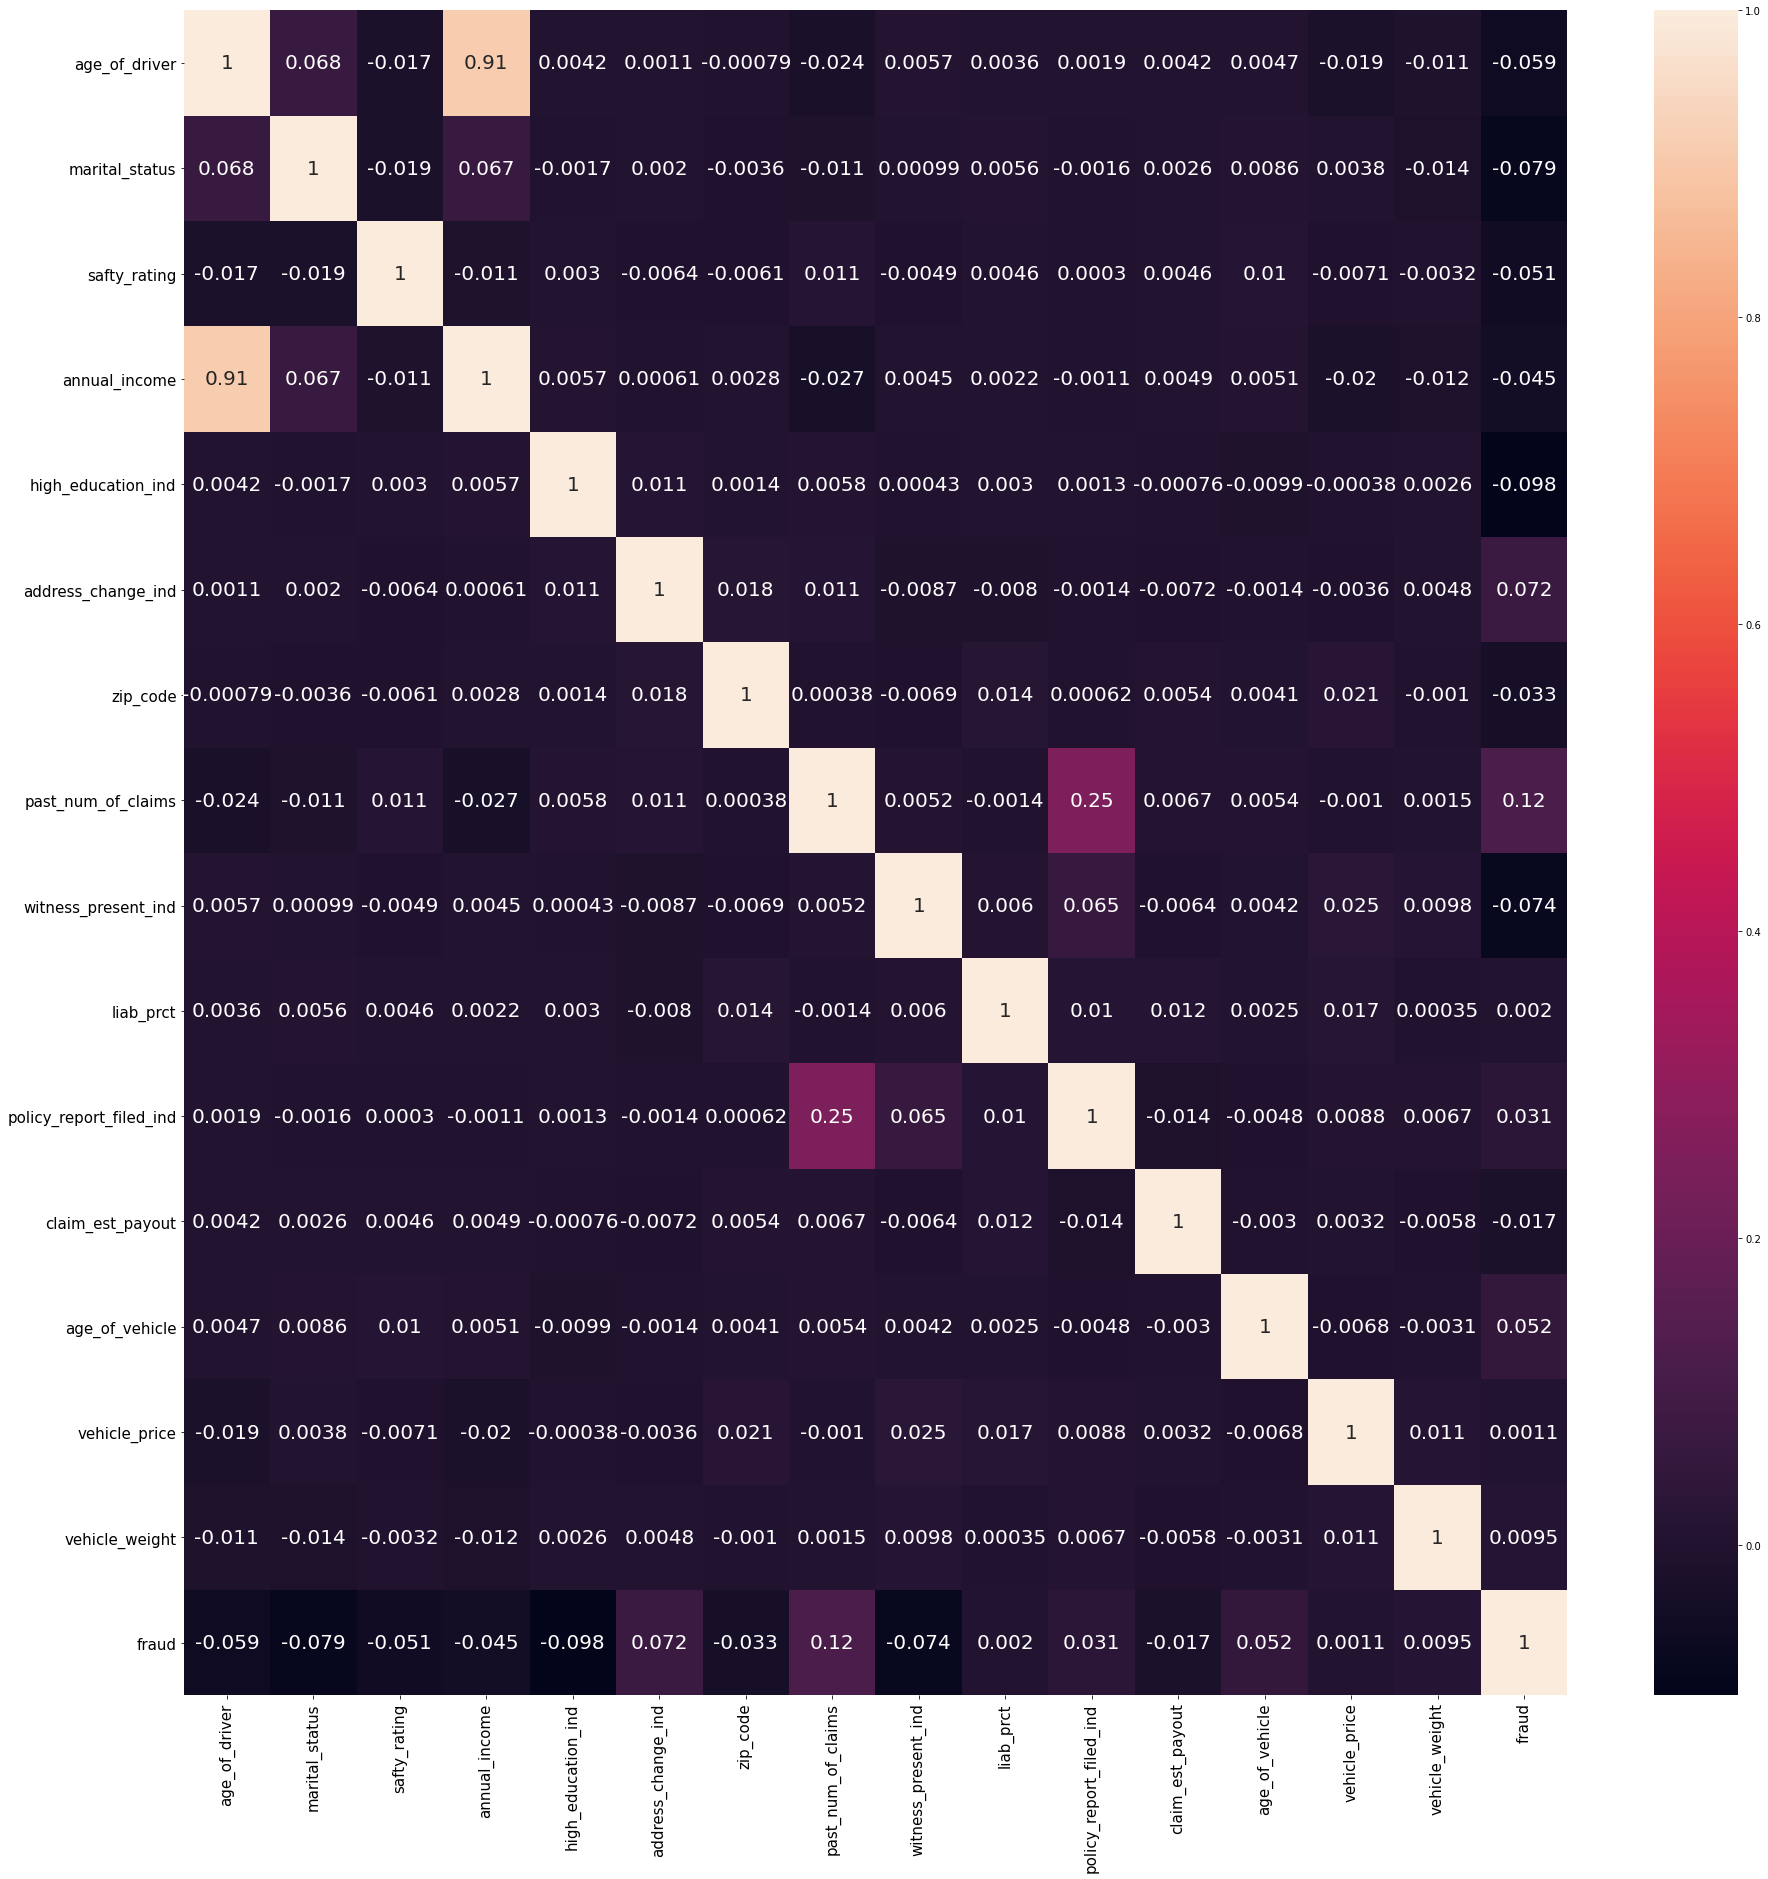

In [7]:
# correlation matrix
plt.figure(figsize = (31,31))
plot = sns.heatmap(df.corr(),annot=True, annot_kws={'size': 20})
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

## categorical data exploration

In [8]:
df_numeric = df[[
    'age_of_driver', 'safty_rating', 'annual_income', 'past_num_of_claims',
    'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price',
    'vehicle_weight'
]]

df_categoric = df[[
    'gender', 'marital_status', 'high_education_ind', 'address_change_ind',
    'living_status', 'zip_code', 'claim_date', 'claim_day_of_week',
    'accident_site', 'witness_present_ind', 'channel',
    'policy_report_filed_ind', 'vehicle_category', 'vehicle_color', 'fraud'
]]

In [9]:
# parking_lot, 
# sns.countplot(x = df_categoric.accident_site, hue='witness_present_ind', data = df_categoric)
df_categoric.groupby(['accident_site']).witness_present_ind.mean()
# df.groupby(['witness_present_ind']).claim_est_payout.mean()

accident_site
Highway        0.290461
Local          0.273647
Parking Lot    0.127370
Name: witness_present_ind, dtype: float64

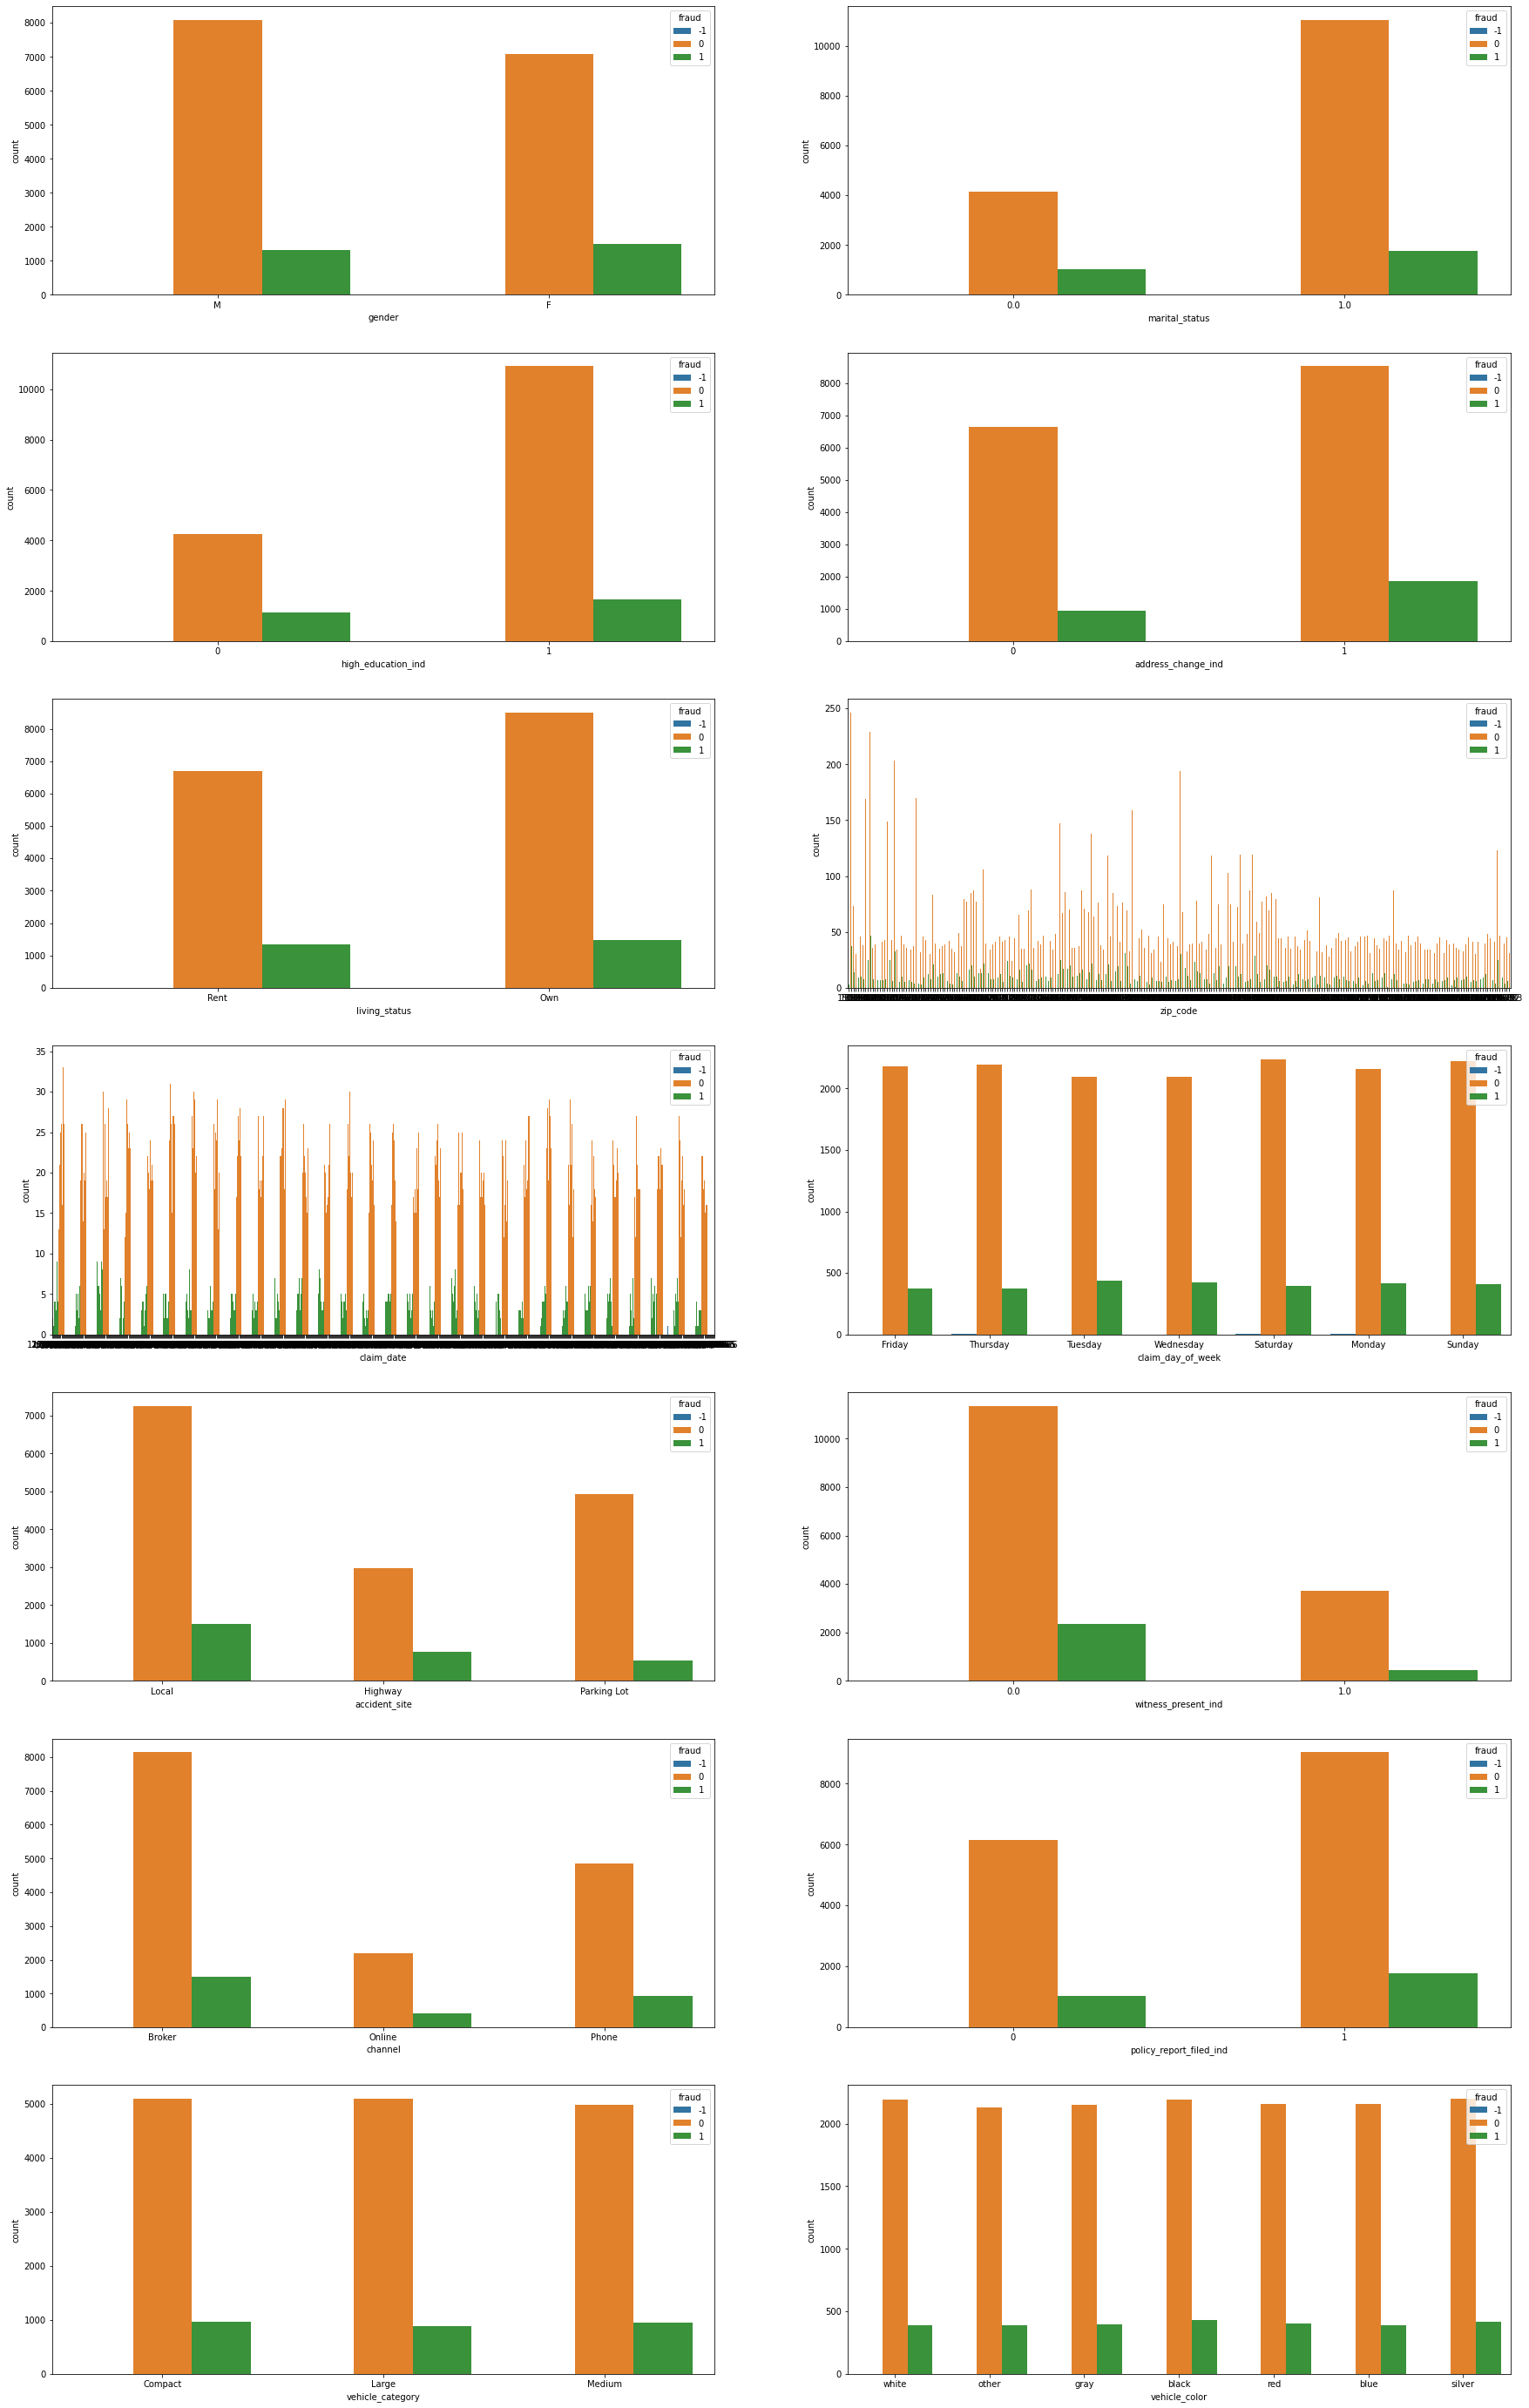

In [10]:
# barplot of cg data
fig, ax = plt.subplots(nrows=7, ncols=2)
fig.set_size_inches(30, 50)

for i in range(0,len(df_categoric.columns[:-1])):
    sns.countplot(x = df_categoric.columns[i], hue='fraud', data = df_categoric , ax = ax[i//2, i-2*(i//2)])

- fraud, zipcode
- description

# data preparation

## data cleaning

### abnormality


In [11]:
# create a copy
data = df.copy()
data_test = df_test.copy()

<AxesSubplot:xlabel='annual_income', ylabel='age_of_driver'>

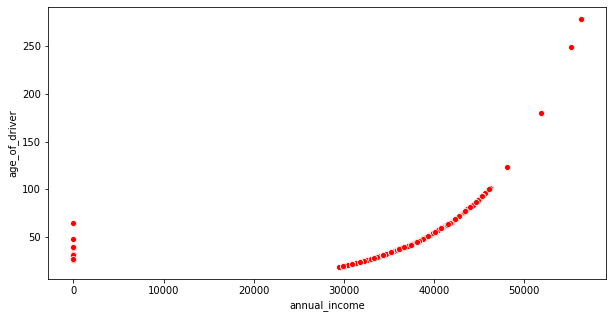

In [12]:
# sns.scatterplot(x=df.annual_income, y=df.age_of_driver)
plt.figure(figsize=(10,5))
sns.scatterplot(x=data_test.annual_income, y=data_test.age_of_driver, color = 'red')
# plt.plot(lm_inc.predict(pd.DataFrame(data.age_of_driver), data.annual_income,), color='black', lw=2)
# plt.plot(data_test.annual_income, lm_age.predict(pd.DataFrame(data_test.annual_income)), color='black', lw=2)

In [13]:
# # age and income
# # intersection check (no intersection)
# index_age = data[data.age_of_driver > 100].index
# index_inc = data[data.annual_income == -1].index

# X = data['age_of_driver'].drop(axis=0, index = index_age).drop(axis=0, index = index_inc)
# y = data['annual_income'].drop(axis=0, index = index_age).drop(axis=0, index = index_inc)

# lm_inc = LinearRegression()
# lm_age = LinearRegression()
# lm_inc.fit(pd.DataFrame(X), pd.DataFrame(y))
# lm_age.fit(pd.DataFrame(y), pd.DataFrame(X))

# # replace age and inc data
# data.at[index_age,'age_of_driver'] = lm_age.predict(pd.DataFrame(data.loc[index_age,'annual_income']))
# data.at[index_inc,'annual_income'] = lm_inc.predict(pd.DataFrame(data.loc[index_inc,'age_of_driver']))

In [14]:
# age and income
# data["age_of_driver"][data.age_of_driver > 100] = 100

# income
index_inc = data[data.annual_income == -1].index
X = data['age_of_driver'].drop(axis=0, index = index_inc)
y = data['annual_income'].drop(axis=0, index = index_inc)
lm_inc = LinearRegression()
lm_inc.fit(pd.DataFrame(X), pd.DataFrame(y))
data.at[index_inc,'annual_income'] = lm_inc.predict(pd.DataFrame(data.loc[index_inc,'age_of_driver']))

In [15]:
data[data.annual_income == -1].count()
data_test[data_test.annual_income == -1].count()
data[data.fraud == -1]
data_test[data_test.zip_code == 0].count()

age_of_driver              20
gender                     20
marital_status             20
safty_rating               20
annual_income              20
high_education_ind         20
address_change_ind         20
living_status              20
zip_code                   20
claim_date                 20
claim_day_of_week          20
accident_site              20
past_num_of_claims         20
witness_present_ind        20
liab_prct                  20
channel                    20
policy_report_filed_ind    20
claim_est_payout           20
age_of_vehicle             20
vehicle_category           20
vehicle_price              20
vehicle_color              20
vehicle_weight             20
dtype: int64

In [16]:
# test data
# data_test["age_of_driver"][data_test.age_of_driver > 100] = 100

index_inc_test = data_test[data_test.annual_income == -1].index
X_test = data_test['age_of_driver'].drop(axis=0, index = index_inc_test)
y_test = data_test['annual_income'].drop(axis=0, index = index_inc_test)
lm_inc_2 = LinearRegression()
lm_inc_2.fit(pd.DataFrame(X_test), pd.DataFrame(y_test))
data_test.at[index_inc_test,'annual_income'] = lm_inc_2.predict(pd.DataFrame(data_test.loc[index_inc_test,'age_of_driver']))

In [17]:
# zip_code (no action yet) 23 rows
data[data.zip_code == 0]
data.drop(data[data.zip_code == 0].index , inplace=True)

In [18]:
# fraud = -1 (change to 1)： suppose it is typo
data[data.fraud == -1]
# data["fraud"][data.fraud == -1] = 1
data.drop(data[data.fraud == -1].index , inplace=True)

### missing value

In [19]:
# training data missing value
# marital_status
data[data.marital_status.isna()]

# witness_present_ind
data[data.witness_present_ind.isna()]

# claim_est_payout
data[data.claim_est_payout.isna()]

# age_of_vehicle
data[data.age_of_vehicle.isna()]

data.dropna(inplace = True)

In [20]:
# test data missing value_numeric
# data_test['marital_status'][data_test.marital_status.isna()] = 1 # most married
# data_test['witness_present_ind'][data_test.witness_present_ind.isna()] = 0 # most 0
data_test['claim_est_payout'][data_test.claim_est_payout.isna()] = data_test.claim_est_payout.mean()
data_test['age_of_vehicle'][data_test.age_of_vehicle.isna()] = data_test.age_of_vehicle.mean()

<ipython-input-20-6a1923332330>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['claim_est_payout'][data_test.claim_est_payout.isna()] = data_test.claim_est_payout.mean()
<ipython-input-20-6a1923332330>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['age_of_vehicle'][data_test.age_of_vehicle.isna()] = data_test.age_of_vehicle.mean()


## feature engineering

In [21]:
# claim_date
data["claim_month"] = pd.to_datetime(data['claim_date']).dt.month
data["claim_year"] = pd.to_datetime(data['claim_date']).dt.year

# claim_date
data_test["claim_month"] = pd.to_datetime(data_test['claim_date']).dt.month
data_test["claim_year"] = pd.to_datetime(data_test['claim_date']).dt.year

In [22]:
# convert zipcode to city
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

# train
l = []
for i in data.zip_code:
    inc = search.by_zipcode(i).state
    l.append(inc)
data['state'] = l

# test
l = []
for i in data_test.zip_code:
    inc = search.by_zipcode(i).state
    l.append(inc)
data_test['state'] = l

In [23]:
#month.mean()

In [24]:
year = data.groupby(['claim_year']).fraud.mean()
week = data.groupby(['claim_day_of_week']).fraud.mean()
month = data.groupby(['claim_month']).fraud.mean()
month > month.mean()
week > week.mean()

claim_day_of_week
Friday       False
Monday        True
Saturday     False
Sunday        True
Thursday     False
Tuesday       True
Wednesday     True
Name: fraud, dtype: bool

<AxesSubplot:xlabel='accident_site', ylabel='fraud'>

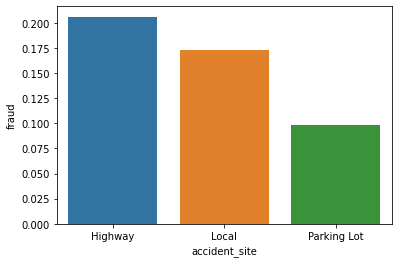

In [25]:
#check the relationship between fraud rate and year, month
# sns.barplot(x= pd.DataFrame(year).index, y="fraud", data=pd.DataFrame(year))
# sns.barplot(x= pd.DataFrame(month).index, y="fraud", data=pd.DataFrame(month))
# sns.barplot(x= pd.DataFrame(week).index, y="fraud", data=pd.DataFrame(week))
# sns.barplot(x= pd.DataFrame(data.groupby(['vehicle_color']).fraud.mean()).index, y="fraud", data=pd.DataFrame(data.groupby(['vehicle_color']).fraud.mean()))
# sns.barplot(x= pd.DataFrame(data.groupby(['state']).fraud.mean()).index, y="fraud", data=pd.DataFrame(data.groupby(['state']).fraud.mean()))
# sns.barplot(x= pd.DataFrame(data.groupby(['month_high']).fraud.mean()).index, y="fraud", data=pd.DataFrame(data.groupby(['month_high']).fraud.mean()))
# sns.barplot(x= pd.DataFrame(data.groupby(['policy_report_filed_ind']).fraud.mean()).index, y="fraud", data=pd.DataFrame(data.groupby(['policy_report_filed_ind']).fraud.mean()))
sns.barplot(x= pd.DataFrame(data.groupby(['accident_site']).fraud.mean()).index, y="fraud", data=pd.DataFrame(data.groupby(['accident_site']).fraud.mean()))

- tuesday, VA, online channel,'high_education_ind', 'witness_present_ind'

In [26]:
# create new feature day, month, year
l = []
for i in data['claim_year']:
    if i == 2015: l.append(0)
    else: l.append(1)
data['year_2016'] = l

l = []
for i in data['claim_month']:
    if i == 4 or i == 5 or i == 8 or i == 10  or i ==12: l.append(1)
    else: l.append(0)
data['month_high'] = l

l = []
for i in data['claim_day_of_week']:
    if i == 'Monday' or i == 'Wednesday' or i == 'Tuesday' or i == 'Sunday': l.append(1)
    else: l.append(0)
data['weekday_high'] = l


#test
l = []
for i in data_test['claim_year']:
    if i == 2015: l.append(0)
    else: l.append(1)
data_test['year_2016'] = l

l = []
for i in data_test['claim_month']:
    if i == 4 or i == 5 or i == 8 or i == 10  or i ==12: l.append(1)
    else: l.append(0)
data_test['month_high'] = l

l = []
for i in data_test['claim_day_of_week']:
    if i == 'Monday' or i == 'Wednesday' or i == 'Tuesday' or i == 'Sunday': l.append(1)
    else: l.append(0)
data_test['weekday_high'] = l

In [27]:
data.drop(['claim_date', 'zip_code','claim_year', 'claim_month', 'claim_day_of_week'], axis=1, inplace=True)
data_test.drop(['claim_date', 'zip_code', 'claim_year', 'claim_month', 'claim_day_of_week'], axis=1, inplace=True)

## data transformation

### transform numeric variable

In [28]:
# distribution of variables
d1.hist(bins=30, figsize = (10,10),color = 'red', alpha=0.3, grid=False)

NameError: name 'd1' is not defined

In [ ]:
d2.hist(bins=30, figsize = (10,10),color = 'red', alpha=0.3, grid=False)

In [ ]:
d1 = data[['vehicle_weight','age_of_driver','safty_rating','annual_income','claim_est_payout','vehicle_price']]
d2 = dt[['cr_vehicle_weight','cr_age_of_driver','c_safty_rating','s_annual_income','cr_claim_est_payout','cr_vehicle_price']]

In [29]:
dt = data.copy()
dt_test = data_test.copy()
dt_test.state.unique()
# dt.head(5).style.background_gradient(cmap="Wistia", text_color_threshold=0.02)

array(['IA', 'AZ', 'VA', 'CO', 'PA', None], dtype=object)

In [30]:
dt['cr_vehicle_weight'] = data.vehicle_weight**(1/3)
dt['cr_age_of_driver'] = data.age_of_driver**(1/3)
dt['c_safty_rating'] = data.safty_rating**(3)
dt['s_annual_income'] = data.annual_income**(2)
dt['cr_claim_est_payout'] = data.claim_est_payout**(1/3)
dt['cr_vehicle_price'] = data.vehicle_price**(1/3)

In [31]:
# (data.vehicle_weight**(1/3)).hist(bins=30, figsize = (15,15))
# (data.age_of_driver**(1/3)).hist(bins=30, figsize = (10,10))
# (data.safty_rating**3).hist(bins=30, figsize = (10,10))
# (data.annual_income**2).hist(bins=30, figsize = (10,10))
# (data.claim_est_payout**(1/3)).hist(bins=30, figsize = (10,10))
# (data.vehicle_price**(1/3)).hist(bins=30, figsize = (10,10))
# (data.vehicle_weight**(1/3)).hist(bins=30, figsize = (10,10))

#train
dt['cr_vehicle_weight'] = data.vehicle_weight**(1/3)
dt['cr_age_of_driver'] = data.age_of_driver**(1/3)
dt['c_safty_rating'] = data.safty_rating**(3)
dt['s_annual_income'] = data.annual_income**(2)
dt['cr_claim_est_payout'] = data.claim_est_payout**(1/3)
dt['cr_vehicle_price'] = data.vehicle_price**(1/3)
dt['cr_vehicle_weight'] = data.vehicle_weight**(1/3)

dt.drop(['vehicle_weight', 'age_of_driver','safty_rating',
         'annual_income','claim_est_payout','vehicle_price'], axis=1, inplace=True)

#test
dt_test['cr_vehicle_weight'] = data_test.vehicle_weight**(1/3)
dt_test['cr_age_of_driver'] = data_test.age_of_driver**(1/3)
dt_test['c_safty_rating'] = data_test.safty_rating**(3)
dt_test['s_annual_income'] = data_test.annual_income**(2)
dt_test['cr_claim_est_payout'] = data_test.claim_est_payout**(1/3)
dt_test['cr_vehicle_price'] = data_test.vehicle_price**(1/3)

dt_test.drop(['vehicle_weight', 'age_of_driver','safty_rating',
         'annual_income','claim_est_payout','vehicle_price'], axis=1, inplace=True)

In [32]:
dt.head(5)
dt_test.head(5)

,gender,marital_status,high_education_ind,address_change_ind,living_status,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,...,state,year_2016,month_high,weekday_high,cr_vehicle_weight,cr_age_of_driver,c_safty_rating,s_annual_income,cr_claim_est_payout,cr_vehicle_price
0,M,1.0,1,0,Own,Highway,0,0.0,25,Phone,...,IA,1,1,0,29.863557,3.391211,389017,1.341977e+09,17.320953,28.988736
1,M,1.0,1,1,Own,Highway,0,1.0,50,Broker,...,AZ,0,0,0,25.132813,3.825862,250047,1.620224e+09,19.470405,34.116792
2,F,0.0,1,1,Own,Parking Lot,0,0.0,98,Broker,...,VA,1,0,1,27.748193,3.391211,421875,1.342050e+09,17.770886,36.920591
3,M,1.0,0,1,Own,Local,0,1.0,45,Phone,...,IA,0,1,1,29.891258,3.207534,373248,1.222202e+09,19.964326,28.625934
4,F,1.0,1,1,Rent,Local,0,1.0,11,Online,...,VA,1,0,1,28.417939,2.884499,343000,1.009714e+09,18.402650,26.322604


### transform categorical variable

In [33]:
# ordinal variable vehicle_category
size_mapping = {'Large': 3,
                'Medium': 2,
                'Compact': 1}

dt['vehicle_category'] = dt['vehicle_category'].map(size_mapping)
dt_test['vehicle_category'] = dt_test['vehicle_category'].map(size_mapping)
dt.head().style.background_gradient(cmap="Wistia", text_color_threshold=0.02)

,gender,marital_status,high_education_ind,address_change_ind,living_status,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,age_of_vehicle,vehicle_category,vehicle_color,fraud,state,year_2016,month_high,weekday_high,cr_vehicle_weight,cr_age_of_driver,c_safty_rating,s_annual_income,cr_claim_est_payout,cr_vehicle_price
0,M,1.000000,1,1,Rent,Local,1,0.000000,74,Broker,0,9.000000,1,white,0,CO,1,1,0,25.282833,3.583048,614125,1466966601.000000,19.601219,23.444082
1,F,0.000000,0,1,Rent,Highway,1,1.000000,79,Online,0,4.000000,3,white,0,PA,0,0,0,30.614001,2.758924,421875,926898025.000000,14.367844,30.874082
2,F,0.000000,0,1,Own,Local,0,0.000000,0,Broker,0,3.000000,1,white,1,VA,1,1,1,28.058952,3.659306,658503,1514999929.000000,18.453390,27.892951
3,F,1.000000,1,0,Own,Local,3,0.000000,99,Broker,1,4.000000,2,other,1,PA,1,1,0,33.716671,3.870877,195112,1648766025.000000,18.340977,23.632285
4,M,1.000000,1,0,Rent,Highway,0,1.000000,7,Broker,0,7.000000,2,gray,0,IA,0,1,1,29.578004,3.361975,857375,1323504400.000000,16.560096,33.637502


In [34]:
# # 1nn to fill missing state value
# state_index = dt_test[dt_test.state.isna()].index

# from sklearn.preprocessing import MinMaxScaler

# X_knn_s = dt_test[['high_education_ind', 'liab_prct',
#                      's_annual_income', 'cr_age_of_driver', 'cr_vehicle_price','past_num_of_claims',
#                      'vehicle_category', 'c_safty_rating', 'cr_vehicle_weight']]

# y_knn_s = dt_test['state']

# scaler = MinMaxScaler()

# scaler.fit(X_knn_s)
# X_knn_s_std = pd.DataFrame(scaler.transform(X_knn_s), columns=X_knn_s.columns)


# X_train_s = X_knn_s_std.drop(state_index, axis=0)


# X_test_s = X_knn_s_std.iloc[state_index, :]


# y_train_s = y_knn_s.drop(state_index, axis=0)


# knn = neighbors.KNeighborsClassifier(n_neighbors=1,
#                                      p=2,
#                                      metric='minkowski')


# knn_s = knn.fit(X_train_s, y_train_s)
# knn_s.predict(X_test_s)
# dt_test.at[state_index, 'state'] = knn_s.predict(X_test_s)                  
                     

In [35]:
dt_2 = pd.get_dummies(dt, drop_first=True)
dt_2_test = pd.get_dummies(dt_test, drop_first=True)
# dt_2.head(5).style.background_gradient(cmap="Wistia", text_color_threshold=0.02)
dt_2.head(5).style.background_gradient(cmap="Wistia", text_color_threshold=0.02)

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,age_of_vehicle,vehicle_category,fraud,year_2016,month_high,weekday_high,cr_vehicle_weight,cr_age_of_driver,c_safty_rating,s_annual_income,cr_claim_est_payout,cr_vehicle_price,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,state_CO,state_IA,state_PA,state_VA
0,1.000000,1,1,1,0.000000,74,0,9.000000,1,0,1,1,0,25.282833,3.583048,614125,1466966601.000000,19.601219,23.444082,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0.000000,0,1,1,1.000000,79,0,4.000000,3,0,0,0,0,30.614001,2.758924,421875,926898025.000000,14.367844,30.874082,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0.000000,0,1,0,0.000000,0,0,3.000000,1,1,1,1,1,28.058952,3.659306,658503,1514999929.000000,18.453390,27.892951,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1.000000,1,0,3,0.000000,99,1,4.000000,2,1,1,1,0,33.716671,3.870877,195112,1648766025.000000,18.340977,23.632285,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1.000000,1,0,0,1.000000,7,0,7.000000,2,0,0,1,1,29.578004,3.361975,857375,1323504400.000000,16.560096,33.637502,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## test categotical missing data

In [36]:
marital_index = dt_2_test[dt_2_test.marital_status.isna()].index
witness_index = dt_2_test[dt_2_test.witness_present_ind.isna()].index

In [37]:
# test data missing value_categorical_marital_status
from sklearn.preprocessing import MinMaxScaler

X_knn_m = dt_2_test[['high_education_ind', 'liab_prct',
                     's_annual_income', 'cr_age_of_driver', 'gender_M', 'living_status_Rent']]

X_knn_w = dt_2_test[['accident_site_Parking Lot', 'channel_Phone',
                     'vehicle_color_gray', 'policy_report_filed_ind']]

y_knn_m = dt_2_test['marital_status']
y_knn_w = dt_2_test['witness_present_ind']

scaler = MinMaxScaler()

scaler.fit(X_knn_m)
X_knn_m_std = pd.DataFrame(scaler.transform(X_knn_m), columns=X_knn_m.columns)

scaler.fit(X_knn_w)
X_knn_w_std = pd.DataFrame(scaler.transform(X_knn_w), columns=X_knn_w.columns)


X_train_m = X_knn_m_std.drop(marital_index, axis=0)
X_train_w = X_knn_w_std.drop(witness_index, axis=0)

X_test_m = X_knn_m_std.iloc[marital_index, :]
X_test_w = X_knn_w_std.iloc[witness_index, :]

y_train_m = y_knn_m.drop(marital_index, axis=0)
y_train_w = y_knn_w.drop(witness_index, axis=0)

knn = neighbors.KNeighborsClassifier(n_neighbors=1,
                                     p=2,
                                     metric='minkowski')


knn_m = knn.fit(X_train_m, y_train_m)
knn_m.predict(X_test_m)
dt_2_test.at[marital_index, 'marital_status'] = knn_m.predict(X_test_m)

knn_w = knn.fit(X_train_w, y_train_w)
knn_w.predict(X_test_w)
dt_2_test.at[witness_index, 'witness_present_ind'] = knn_w.predict(X_test_w)

/Users/hanxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/hanxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/hanxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/hanxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [38]:
dt_2_test.loc[witness_index, ['witness_present_ind', 'accident_site_Parking Lot', 'accident_site_Local']].head(25)
dt_2_test.loc[witness_index, 'witness_present_ind'].mean()

0.2727272727272727

## data balancing

In [54]:
# split label and attributes
X = dt_2.drop("fraud",axis=1)
y = dt_2["fraud"]

In [55]:
X.columns

Index(['marital_status', 'high_education_ind', 'address_change_ind',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct',
       'policy_report_filed_ind', 'age_of_vehicle', 'vehicle_category',
       'year_2016', 'month_high', 'weekday_high', 'cr_vehicle_weight',
       'cr_age_of_driver', 'c_safty_rating', 's_annual_income',
       'cr_claim_est_payout', 'cr_vehicle_price', 'gender_M',
       'living_status_Rent', 'accident_site_Local',
       'accident_site_Parking Lot', 'channel_Online', 'channel_Phone',
       'vehicle_color_blue', 'vehicle_color_gray', 'vehicle_color_other',
       'vehicle_color_red', 'vehicle_color_silver', 'vehicle_color_white',
       'state_CO', 'state_IA', 'state_PA', 'state_VA'],
      dtype='object')

In [48]:
from imblearn.over_sampling import RandomOverSampler

# oversampling
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=1)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [312]:
X_over.shape
y_over.value_counts()

0    15018
1    15018
Name: fraud, dtype: int64

In [313]:
X_over.columns

Index(['marital_status', 'high_education_ind', 'address_change_ind',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct',
       'policy_report_filed_ind', 'age_of_vehicle', 'vehicle_category',
       'year_2016', 'month_high', 'weekday_high', 'cr_vehicle_weight',
       'cr_age_of_driver', 'c_safty_rating', 's_annual_income',
       'cr_claim_est_payout', 'cr_vehicle_price', 'gender_M',
       'living_status_Rent', 'accident_site_Local',
       'accident_site_Parking Lot', 'channel_Online', 'channel_Phone',
       'vehicle_color_blue', 'vehicle_color_gray', 'vehicle_color_other',
       'vehicle_color_red', 'vehicle_color_silver', 'vehicle_color_white',
       'state_CO', 'state_IA', 'state_PA', 'state_VA'],
      dtype='object')

## feature selection

### RFE

In [40]:
X.shape

(17811, 34)

In [41]:
# choose feature from 40 features in X
from sklearn.feature_selection import RFE
lr = LogisticRegression()

rfe = RFE(lr,24)
rfe = rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))
X_rfe = X[X.columns[rfe.support_]]

TypeError: __init__() takes 2 positional arguments but 3 were given

In [316]:
X.drop(X_rfe.columns, axis=1).columns

Index(['living_status_Rent', 'channel_Phone', 'vehicle_color_blue',
       'vehicle_color_gray', 'vehicle_color_other', 'vehicle_color_red',
       'vehicle_color_silver', 'vehicle_color_white', 'state_IA', 'state_PA'],
      dtype='object')

### SFS

In [42]:
classifier = CatBoostClassifier(eval_metric="AUC")
sfs = SFS(classifier, 
           k_features=28, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=5, n_jobs=-1)

sfs = sfs.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [43]:
index_sfs = sfs.get_metric_dict()[19]['feature_idx']
feature_sfs = sfs.get_metric_dict()[19]['feature_names']
feature_sfs

KeyError: 19

21'marital_status',
 'high_education_ind',
 'address_change_ind',
 'past_num_of_claims',
 'witness_present_ind',
 'liab_prct',
 'age_of_vehicle',
 'vehicle_category',
 'year_2016',
 'weekday_high',
 'cr_age_of_driver',
 'c_safty_rating',
 'cr_claim_est_payout',
 'gender_M',
 'living_status_Rent',
 'accident_site_Local',
 'accident_site_Parking Lot',
 'vehicle_color_other',
 'vehicle_color_silver',
 'vehicle_color_white',
 'state_VA'

19'marital_status',
 'high_education_ind',
 'address_change_ind',
 'past_num_of_claims',
 'witness_present_ind',
 'liab_prct',
 'age_of_vehicle',
 'vehicle_category',
 'year_2016',
 'weekday_high',
 'cr_age_of_driver',
 'c_safty_rating',
 'cr_claim_est_payout',
 'gender_M',
 'living_status_Rent',
 'accident_site_Local',
 'accident_site_Parking Lot',
 'vehicle_color_white',
 'state_VA')

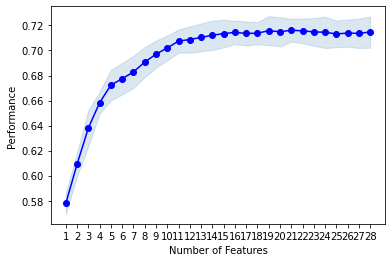

In [106]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

In [44]:
X_sfs = X[['marital_status', 'high_education_ind', 'address_change_ind', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'age_of_vehicle', 'vehicle_category', 'year_2016', 'weekday_high', 'cr_age_of_driver',
           'c_safty_rating', 'cr_claim_est_payout', 'gender_M', 'living_status_Rent', 'accident_site_Local', 'accident_site_Parking Lot', 'vehicle_color_other', 'vehicle_color_silver', 'vehicle_color_white', 'state_VA']]

In [45]:
X_sfs.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,age_of_vehicle,vehicle_category,year_2016,weekday_high,...,c_safty_rating,cr_claim_est_payout,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,vehicle_color_other,vehicle_color_silver,vehicle_color_white,state_VA
0,1.0,1,1,1,0.0,74,9.0,1,1,0,...,614125,19.601219,1,1,1,0,0,0,1,0
1,0.0,0,1,1,1.0,79,4.0,3,0,0,...,421875,14.367844,0,1,0,0,0,0,1,0
2,0.0,0,1,0,0.0,0,3.0,1,1,1,...,658503,18.453390,0,0,1,0,0,0,1,1
3,1.0,1,0,3,0.0,99,4.0,2,1,0,...,195112,18.340977,0,0,1,0,1,0,0,0
4,1.0,1,0,0,1.0,7,7.0,2,0,1,...,857375,16.560096,1,1,0,0,0,0,0,0


# modeling

In [33]:
inner_cv = KFold(n_splits=10, shuffle=True)
outer_cv = KFold(n_splits=10, shuffle=True)

## logistic regression
The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

In [42]:
# Split validation
np.random.seed(88)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=88, stratify=y)

clf = LogisticRegression(penalty='l2', C=1e5)
clf = clf.fit(X_train, y_train)

#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred))

0 [0.85592759 0.14407241] 1.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4511
           1       0.00      0.00      0.00       840

    accuracy                           0.84      5351
   macro avg       0.42      0.50      0.46      5351
weighted avg       0.71      0.84      0.77      5351



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
# set loop index for hyperparameter tuning
inner_cv = KFold(n_splits = 5, shuffle=True)
outer_cv = KFold(n_splits = 5, shuffle=True)

# logistic regression
params = {
        'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000],
        'penalty':['l1','l2']     
    }

lr = GridSearchCV(estimator=LogisticRegression(random_state=88, solver='liblinear'),
                  param_grid= params,
                  scoring='accuracy',
                  cv=inner_cv,
                  verbose=1,
                  n_jobs=-1).fit(X,y)

print("Logistic Regression Parameter Tuning")
print("============================================================================")
print("Non-nested CV accuracy: ", lr.best_score_)
print("Optimal Parameter: ", lr.best_params_)   
# nested_score_lr = cross_val_score(lr, X=X, y=y, cv=outer_cv)
# print("Nested CV accuracy: ",nested_score_lr.mean(), " +/- ", nested_score_lr.std())


Fitting 5 folds for each of 24 candidates, totalling 120 fits


KeyboardInterrupt: 

## decision tree

In [262]:
# set loop index for hyperparameter tuning
inner_cv = KFold(n_splits = 5, shuffle=True)
outer_cv = KFold(n_splits = 5, shuffle=True)

# set parameter
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),
    'max_leaf_nodes': range(20, 40),
}

# set GridSearchCV
dc = GridSearchCV(estimator=DecisionTreeClassifier(random_state=88),
                  param_grid=params,
                  scoring="accuracy", 
                  n_jobs=-1,
                  cv=inner_cv)

dc = dc.fit(X_over,y_over)

# print the evaluation
print("Decision Tree Parameter Tuning")
print("============================================================================")
print("Non-nested CV accuracy: ", dc.best_score_)
print("Optimal Parameter: ", dc.best_params_)   
# nested_score_dc = cross_val_score(dc, X=X_over, y=y_over, cv=outer_cv)
# print("Nested CV accuracy: ",nested_score_dc.mean(), " +/- ", nested_score_dc.std())

KeyboardInterrupt: 

In [147]:
# decision tree
np.random.seed(66)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=66, stratify=y)

# clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_leaf_nodes = 34)
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_leaf_nodes = 34)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      4511
           1       0.35      0.04      0.07       840

    accuracy                           0.84      5351
   macro avg       0.60      0.51      0.49      5351
weighted avg       0.77      0.84      0.78      5351



In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc(fpr, tpr)

0.5136287223823247

## random forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_features='auto', bootstrap=True, oob_score=True, random_state=88, n_jobs=-1)

param_grid = {"criterion": ["gini", "entropy"], "min_samples_leaf": [
    1, 3, 5, 7, 9], "min_samples_split": [2, 3, 4, 5, 6, 7], "n_estimators": [100,250, 300, 250, 400]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid,
                  scoring='roc_auc', cv=5, n_jobs=-1)

gs = gs.fit(X, y)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

KeyboardInterrupt: 

In [27]:
rf = RandomForestClassifier( criterion='entropy', 
                             n_estimators=300,
                             min_samples_split=4,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             n_jobs=-1)

rf.fit(X, y)

nested_score = cross_val_score(rf, X=X, y=y, cv=10, scoring = "roc_auc")
print("Nested CV roc_auc: ", nested_score.mean(), " +/- ", nested_score.std())

Nested CV roc_auc:  0.7008249094612969  +/-  0.013738537306133463


In [67]:
X_train.head().style.background_gradient(cmap="Wistia", text_color_threshold=0.02)

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,age_of_vehicle,vehicle_category,year_2016,month_high,weekday_high,cr_vehicle_weight,cr_age_of_driver,c_safty_rating,s_annual_income,cr_claim_est_payout,cr_vehicle_price,gender_M,living_status_Rent,accident_site_Local,accident_site_Parking Lot,channel_Online,channel_Phone,vehicle_color_blue,vehicle_color_gray,vehicle_color_other,vehicle_color_red,vehicle_color_silver,vehicle_color_white,state_CO,state_IA,state_PA,state_VA
25989,0.000000,0,0,0,0.000000,49,1,1.000000,1,1,1,0,25.831592,2.884499,571787,1009587076.000000,14.427250,31.294933,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
18094,0.000000,1,1,1,0.000000,0,1,2.000000,2,1,1,1,36.317010,3.141381,274625,1180472164.000000,15.132781,19.521525,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
14383,0.000000,1,0,0,0.000000,56,0,6.000000,2,0,1,0,19.677070,3.239612,614125,1243197081.000000,23.733489,19.636505,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
25888,0.000000,1,1,0,1.000000,22,0,8.000000,2,1,0,0,21.868214,3.530348,592704,1432092649.000000,17.578905,29.798061,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3791,1.000000,1,0,0,0.000000,59,0,6.000000,3,0,0,0,30.092953,3.556893,274625,1449020356.000000,20.472893,29.725531,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
feature_rank = pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

feature_rank

,variable,importance
16,cr_claim_est_payout,0.096517
15,s_annual_income,0.093031
12,cr_vehicle_weight,0.088374
17,cr_vehicle_price,0.088008
14,c_safty_rating,0.082024
5,liab_prct,0.076621
13,cr_age_of_driver,0.067012
7,age_of_vehicle,0.052741
3,past_num_of_claims,0.034366
8,vehicle_category,0.024606


## xgboost

In [113]:
columns = feature_rank.variable[0:24]
columns
X_select = X[columns]
X_select

,s_annual_income,cr_claim_est_payout,cr_vehicle_weight,cr_vehicle_price,c_safty_rating,liab_prct,cr_age_of_driver,age_of_vehicle,past_num_of_claims,vehicle_category,...,witness_present_ind,marital_status,living_status_Rent,weekday_high,gender_M,policy_report_filed_ind,channel_Phone,month_high,accident_site_Local,state_PA
0,1.466967e+09,19.601219,25.282833,23.444082,614125,74,3.583048,9.0,1,1,...,0.0,1.0,1,0,1,0,0,1,1,0
1,9.268980e+08,14.367844,30.614001,30.874082,421875,79,2.758924,4.0,1,3,...,1.0,0.0,1,0,0,0,0,0,0,1
2,1.515000e+09,18.453390,28.058952,27.892951,658503,0,3.659306,3.0,0,1,...,0.0,0.0,0,1,0,0,0,1,1,0
3,1.648766e+09,18.340977,33.716671,23.632285,195112,99,3.870877,4.0,3,2,...,0.0,1.0,0,0,0,1,0,0,1,1
4,1.323504e+09,16.560096,29.578004,33.637502,857375,7,3.361975,7.0,0,2,...,1.0,1.0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17993,1.792506e+09,16.876664,25.646363,31.795760,804357,99,4.101566,6.0,0,2,...,0.0,1.0,0,0,1,0,0,0,1,1
17994,1.265865e+09,15.991916,31.582131,21.155691,10648,94,3.271066,3.0,1,2,...,0.0,0.0,0,1,0,1,1,0,1,0
17995,1.085900e+09,13.056564,35.446326,40.201972,531441,1,3.000000,5.0,2,2,...,0.0,1.0,1,0,0,1,0,0,1,1
17996,1.561751e+09,21.224163,36.863328,29.233653,636056,75,3.732511,3.0,1,1,...,1.0,1.0,0,0,0,1,0,1,0,1


In [122]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': range(1, 15),
    'min_child_weight': [1, 3, 5, 7, 9, 11],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

classifier = xgboost.XGBClassifier()
rs = RandomizedSearchCV(classifier, param_distributions=params,
                        n_iter=10, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

rs.fit(X, y)

print(rs.best_estimator_)
print(rs.best_score_)
print(rs.best_params_)

ValueError: 'auc' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [94]:
params = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth': range(1, 15),
    'min_child_weight': [1, 3, 5, 7, 8, 9, 10],
    "gamma": [0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

classifier = xgboost.XGBClassifier()
gs = GridSearchCV(classifier, param_grid=params,
                  scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

gs.fit(X_over, y_over)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 11760 candidates, totalling 58800 fits


KeyboardInterrupt: 

In [30]:
xgb = XGBClassifier(min_child_weight=7, max_depth=3, learning_rate=0.05,
                    gamma=0.3, colsample_bytree=0.4, random_state=88, n_jobs=-1)
xgb.fit(X, y)

# print("%.4f" % rf.oob_score_)

nested_score = cross_val_score(xgb, X=X, y=y, cv=10, scoring = "roc_auc")
print("Nested CV roc_auc: ", nested_score.mean(), " +/- ", nested_score.std())

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Nested CV roc_auc:  0.7186271940846181  +/-  0.015356482898724365


In [91]:
feature_rank = pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(xgb.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

feature_rank

,variable,importance
21,accident_site_Parking Lot,0.142870
1,high_education_ind,0.082505
4,witness_present_ind,0.080135
3,past_num_of_claims,0.075426
15,s_annual_income,0.061744
13,cr_age_of_driver,0.057743
0,marital_status,0.057151
2,address_change_ind,0.053982
16,cr_claim_est_payout,0.043629
20,accident_site_Local,0.040466


## catboost

In [53]:
# optuna
params = {
    'learning_rate': [0.03, 0.05, 0.1, 0.15, 0.2],
    'depth': [2,3,4],
    'min_child_samples': [1,2,3],
    'iterations':[400,500,600,800,1000],
    'l2_leaf_reg': [1,3,5,7,9,11,15,20,25,30]
}

classifier = CatBoostClassifier(eval_metric="AUC")
rs = RandomizedSearchCV(classifier, param_distributions=params,
                        n_iter=30, scoring="roc_auc", n_jobs=-1, cv=inner_cv, verbose=3)

rs.fit(X_sfs, y)

print(rs.best_estimator_)
print(rs.best_score_)
print(rs.best_params_)

NameError: name 'inner_cv' is not defined

In [48]:
cb.fit(X_sfs, y, plot=True , verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [49]:
from catboost import Pool

fi = cb.get_feature_importance(Pool(X_sfs,y), type = "Interaction")

fi_new = []
for k,item in enumerate(fi):  
    first = X_sfs.dtypes.index[fi[k][0]]
    second = X_sfs.dtypes.index[fi[k][1]]
    if first != second:
        fi_new.append([first + "_" + second, fi[k][2]])

feature_score = pd.DataFrame(fi_new,columns=['Feature-Pair','Score'])

In [50]:
feature_score

,Feature-Pair,Score
0,c_safty_rating_living_status_Rent,11.579348
1,year_2016_cr_age_of_driver,7.953451
2,age_of_vehicle_c_safty_rating,6.486657
3,marital_status_cr_age_of_driver,5.973636
4,cr_age_of_driver_c_safty_rating,4.818937
...,...,...
82,address_change_ind_cr_age_of_driver,0.018025
83,high_education_ind_age_of_vehicle,0.017310
84,high_education_ind_gender_M,0.014662
85,high_education_ind_vehicle_color_silver,0.013818


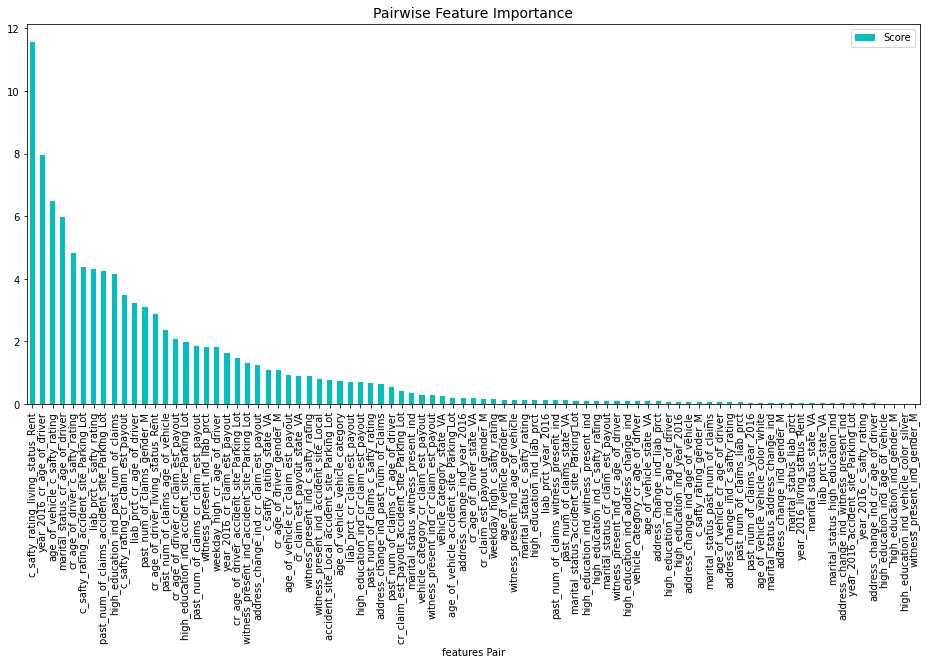

In [60]:
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')
plt.rcParams["figure.figsize"] = (16,7)
ax = feature_score.plot('Feature-Pair', 'Score', kind='bar', color='c')
ax.set_title("Pairwise Feature Importance", fontsize = 14)
ax.set_xlabel("features Pair")
plt.show()

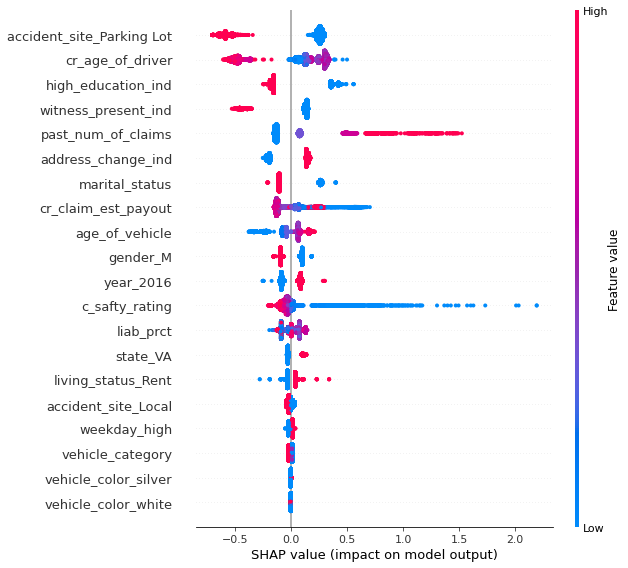

In [53]:
import shap

shap_values = cb.get_feature_importance(Pool(X_sfs,y), type = "ShapValues")
                                                                     
shap_values = shap_values[:,:-1]

shap.summary_plot(shap_values, X_sfs) 

In [52]:
conda install shap

Solving environment: done

## Package Plan ##

  environment location: /Users/hanxiao/opt/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shap-0.39.0                |   py38hb2f4e1b_0         495 KB
    slicer-0.0.7               |     pyhd3eb1b0_0          18 KB
    ------------------------------------------------------------
                                           Total:         513 KB

The following NEW packages will be INSTALLED:

  shap               pkgs/main/osx-64::shap-0.39.0-py38hb2f4e1b_0
  slicer             pkgs/main/noarch::slicer-0.0.7-pyhd3eb1b0_0



slicer-0.0.7         | 18 KB     | ##################################### | 100% 
shap-0.39.0          | 495 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restar

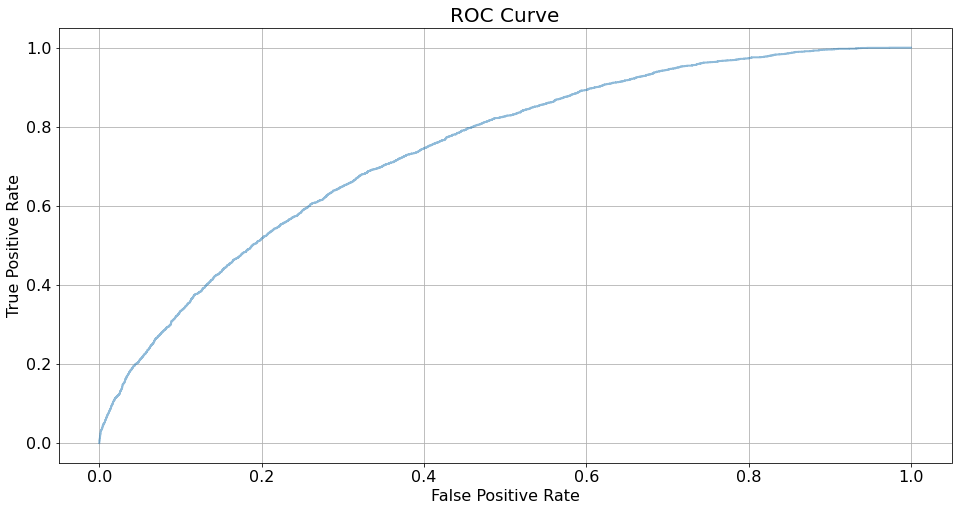

In [63]:
from catboost.utils import get_roc_curve
(fpr, tpr, thresholds) = get_roc_curve(cb, Pool(X_sfs, y), plot=True)

In [37]:
nested_score = cross_val_score(
    rs, X = X_sfs, y = y, cv = outer_cv, scoring="roc_auc")
print("Nested CV roc_auc: ", nested_score.mean(), " +/- ", nested_score.std())

Fitting 10 folds for each of 30 candidates, totalling 300 fits
0:	total: 2.9ms	remaining: 1.16s
1:	total: 4.95ms	remaining: 985ms
2:	total: 6.67ms	remaining: 883ms
3:	total: 8.91ms	remaining: 882ms
4:	total: 10.9ms	remaining: 862ms
5:	total: 12.9ms	remaining: 847ms
6:	total: 15ms	remaining: 841ms
7:	total: 17.2ms	remaining: 841ms
8:	total: 19.7ms	remaining: 855ms
9:	total: 21.6ms	remaining: 843ms
10:	total: 23.5ms	remaining: 833ms
11:	total: 25.2ms	remaining: 816ms
12:	total: 27.4ms	remaining: 816ms
13:	total: 29.3ms	remaining: 807ms
14:	total: 31ms	remaining: 795ms
15:	total: 32.6ms	remaining: 783ms
16:	total: 34.4ms	remaining: 775ms
17:	total: 36.6ms	remaining: 778ms
18:	total: 38.5ms	remaining: 771ms
19:	total: 40.1ms	remaining: 763ms
20:	total: 42.1ms	remaining: 759ms
21:	total: 43.7ms	remaining: 751ms
22:	total: 45.8ms	remaining: 751ms
23:	total: 47.6ms	remaining: 745ms
24:	total: 49.6ms	remaining: 744ms
25:	total: 51.7ms	remaining: 744ms
26:	total: 53.6ms	remaining: 741ms
27:	tot

282:	total: 553ms	remaining: 229ms
283:	total: 555ms	remaining: 227ms
284:	total: 558ms	remaining: 225ms
285:	total: 560ms	remaining: 223ms
286:	total: 562ms	remaining: 221ms
287:	total: 564ms	remaining: 219ms
288:	total: 566ms	remaining: 218ms
289:	total: 568ms	remaining: 215ms
290:	total: 570ms	remaining: 214ms
291:	total: 572ms	remaining: 212ms
292:	total: 574ms	remaining: 210ms
293:	total: 576ms	remaining: 208ms
294:	total: 579ms	remaining: 206ms
295:	total: 581ms	remaining: 204ms
296:	total: 583ms	remaining: 202ms
297:	total: 585ms	remaining: 200ms
298:	total: 586ms	remaining: 198ms
299:	total: 588ms	remaining: 196ms
300:	total: 590ms	remaining: 194ms
301:	total: 592ms	remaining: 192ms
302:	total: 594ms	remaining: 190ms
303:	total: 596ms	remaining: 188ms
304:	total: 599ms	remaining: 186ms
305:	total: 601ms	remaining: 185ms
306:	total: 603ms	remaining: 183ms
307:	total: 605ms	remaining: 181ms
308:	total: 607ms	remaining: 179ms
309:	total: 609ms	remaining: 177ms
310:	total: 611ms	re

211:	total: 361ms	remaining: 1.34s
212:	total: 363ms	remaining: 1.34s
213:	total: 365ms	remaining: 1.34s
214:	total: 366ms	remaining: 1.34s
215:	total: 368ms	remaining: 1.33s
216:	total: 370ms	remaining: 1.33s
217:	total: 371ms	remaining: 1.33s
218:	total: 373ms	remaining: 1.33s
219:	total: 374ms	remaining: 1.33s
220:	total: 376ms	remaining: 1.32s
221:	total: 378ms	remaining: 1.32s
222:	total: 379ms	remaining: 1.32s
223:	total: 381ms	remaining: 1.32s
224:	total: 382ms	remaining: 1.32s
225:	total: 384ms	remaining: 1.31s
226:	total: 385ms	remaining: 1.31s
227:	total: 387ms	remaining: 1.31s
228:	total: 388ms	remaining: 1.31s
229:	total: 390ms	remaining: 1.3s
230:	total: 391ms	remaining: 1.3s
231:	total: 393ms	remaining: 1.3s
232:	total: 395ms	remaining: 1.3s
233:	total: 396ms	remaining: 1.3s
234:	total: 398ms	remaining: 1.29s
235:	total: 399ms	remaining: 1.29s
236:	total: 401ms	remaining: 1.29s
237:	total: 402ms	remaining: 1.29s
238:	total: 404ms	remaining: 1.29s
239:	total: 406ms	remaini

545:	total: 906ms	remaining: 753ms
546:	total: 908ms	remaining: 752ms
547:	total: 910ms	remaining: 750ms
548:	total: 911ms	remaining: 748ms
549:	total: 913ms	remaining: 747ms
550:	total: 915ms	remaining: 746ms
551:	total: 917ms	remaining: 744ms
552:	total: 919ms	remaining: 743ms
553:	total: 921ms	remaining: 742ms
554:	total: 924ms	remaining: 741ms
555:	total: 925ms	remaining: 739ms
556:	total: 927ms	remaining: 737ms
557:	total: 929ms	remaining: 736ms
558:	total: 931ms	remaining: 735ms
559:	total: 933ms	remaining: 733ms
560:	total: 935ms	remaining: 732ms
561:	total: 937ms	remaining: 730ms
562:	total: 939ms	remaining: 729ms
563:	total: 940ms	remaining: 727ms
564:	total: 943ms	remaining: 726ms
565:	total: 945ms	remaining: 724ms
566:	total: 947ms	remaining: 723ms
567:	total: 949ms	remaining: 721ms
568:	total: 950ms	remaining: 720ms
569:	total: 952ms	remaining: 718ms
570:	total: 954ms	remaining: 717ms
571:	total: 956ms	remaining: 716ms
572:	total: 958ms	remaining: 714ms
573:	total: 960ms	re

842:	total: 1.45s	remaining: 270ms
843:	total: 1.45s	remaining: 268ms
844:	total: 1.45s	remaining: 267ms
845:	total: 1.46s	remaining: 265ms
846:	total: 1.46s	remaining: 263ms
847:	total: 1.46s	remaining: 262ms
848:	total: 1.46s	remaining: 260ms
849:	total: 1.46s	remaining: 258ms
850:	total: 1.46s	remaining: 256ms
851:	total: 1.47s	remaining: 255ms
852:	total: 1.47s	remaining: 253ms
853:	total: 1.47s	remaining: 251ms
854:	total: 1.47s	remaining: 250ms
855:	total: 1.47s	remaining: 248ms
856:	total: 1.47s	remaining: 246ms
857:	total: 1.48s	remaining: 244ms
858:	total: 1.48s	remaining: 243ms
859:	total: 1.48s	remaining: 241ms
860:	total: 1.48s	remaining: 239ms
861:	total: 1.48s	remaining: 237ms
862:	total: 1.48s	remaining: 236ms
863:	total: 1.49s	remaining: 234ms
864:	total: 1.49s	remaining: 232ms
865:	total: 1.49s	remaining: 230ms
866:	total: 1.49s	remaining: 229ms
867:	total: 1.49s	remaining: 227ms
868:	total: 1.49s	remaining: 225ms
869:	total: 1.5s	remaining: 224ms
870:	total: 1.5s	rema

110:	total: 182ms	remaining: 473ms
111:	total: 184ms	remaining: 472ms
112:	total: 185ms	remaining: 471ms
113:	total: 187ms	remaining: 469ms
114:	total: 188ms	remaining: 467ms
115:	total: 190ms	remaining: 465ms
116:	total: 191ms	remaining: 463ms
117:	total: 193ms	remaining: 461ms
118:	total: 194ms	remaining: 459ms
119:	total: 196ms	remaining: 456ms
120:	total: 197ms	remaining: 454ms
121:	total: 199ms	remaining: 453ms
122:	total: 200ms	remaining: 451ms
123:	total: 202ms	remaining: 449ms
124:	total: 203ms	remaining: 447ms
125:	total: 205ms	remaining: 445ms
126:	total: 206ms	remaining: 443ms
127:	total: 208ms	remaining: 442ms
128:	total: 209ms	remaining: 440ms
129:	total: 211ms	remaining: 439ms
130:	total: 213ms	remaining: 437ms
131:	total: 214ms	remaining: 435ms
132:	total: 216ms	remaining: 433ms
133:	total: 217ms	remaining: 431ms
134:	total: 219ms	remaining: 430ms
135:	total: 220ms	remaining: 427ms
136:	total: 222ms	remaining: 425ms
137:	total: 223ms	remaining: 424ms
138:	total: 225ms	re

0:	total: 2.7ms	remaining: 1.08s
1:	total: 5.04ms	remaining: 1s
2:	total: 6.61ms	remaining: 874ms
3:	total: 8.47ms	remaining: 839ms
4:	total: 10ms	remaining: 794ms
5:	total: 11.7ms	remaining: 767ms
6:	total: 13.4ms	remaining: 751ms
7:	total: 14.8ms	remaining: 726ms
8:	total: 16.6ms	remaining: 720ms
9:	total: 18.1ms	remaining: 708ms
10:	total: 19.9ms	remaining: 705ms
11:	total: 21.4ms	remaining: 691ms
12:	total: 23ms	remaining: 685ms
13:	total: 24.6ms	remaining: 679ms
14:	total: 26.2ms	remaining: 672ms
15:	total: 27.8ms	remaining: 668ms
16:	total: 29.4ms	remaining: 662ms
17:	total: 31.1ms	remaining: 661ms
18:	total: 32.6ms	remaining: 653ms
19:	total: 34.1ms	remaining: 648ms
20:	total: 35.8ms	remaining: 646ms
21:	total: 37.6ms	remaining: 647ms
22:	total: 39.4ms	remaining: 646ms
23:	total: 41.1ms	remaining: 644ms
24:	total: 42.6ms	remaining: 639ms
25:	total: 44.5ms	remaining: 640ms
26:	total: 46.3ms	remaining: 640ms
27:	total: 48.2ms	remaining: 640ms
28:	total: 49.7ms	remaining: 636ms
29:

302:	total: 535ms	remaining: 171ms
303:	total: 537ms	remaining: 169ms
304:	total: 539ms	remaining: 168ms
305:	total: 541ms	remaining: 166ms
306:	total: 543ms	remaining: 165ms
307:	total: 545ms	remaining: 163ms
308:	total: 547ms	remaining: 161ms
309:	total: 549ms	remaining: 159ms
310:	total: 551ms	remaining: 158ms
311:	total: 553ms	remaining: 156ms
312:	total: 555ms	remaining: 154ms
313:	total: 556ms	remaining: 152ms
314:	total: 558ms	remaining: 151ms
315:	total: 560ms	remaining: 149ms
316:	total: 562ms	remaining: 147ms
317:	total: 564ms	remaining: 145ms
318:	total: 565ms	remaining: 144ms
319:	total: 567ms	remaining: 142ms
320:	total: 569ms	remaining: 140ms
321:	total: 570ms	remaining: 138ms
322:	total: 572ms	remaining: 136ms
323:	total: 574ms	remaining: 135ms
324:	total: 576ms	remaining: 133ms
325:	total: 578ms	remaining: 131ms
326:	total: 580ms	remaining: 129ms
327:	total: 581ms	remaining: 128ms
328:	total: 583ms	remaining: 126ms
329:	total: 585ms	remaining: 124ms
330:	total: 587ms	re

KeyboardInterrupt: 

In [47]:
cb = CatBoostClassifier(min_child_samples=2, depth=2,
                        learning_rate=0.05, iterations=400, l2_leaf_reg=5)

# nested_score = cross_val_score(
#     cb, X = X_sfs, y = y, cv = outer_cv, scoring="roc_auc")
# print("Nested CV roc_auc: ", nested_score.mean(), " +/- ", nested_score.std())

In [39]:
feature_rank = pd.concat((pd.DataFrame(X_sfs.columns, columns = ['variable']), 
           pd.DataFrame(cb.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

feature_rank

,variable,importance
10,cr_age_of_driver,16.840161
16,accident_site_Parking Lot,16.396009
12,cr_claim_est_payout,9.646696
3,past_num_of_claims,7.401718
4,witness_present_ind,7.236805
5,liab_prct,6.541499
11,c_safty_rating,6.368536
1,high_education_ind,6.367341
6,age_of_vehicle,4.626045
2,address_change_ind,4.135551


## lightGBM

## adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier


dtc = DecisionTreeClassifier(random_state = 88, 
                             max_features = "auto", 
                             #class_weight = "balanced",
                             max_depth = None,
                            )


abc = AdaBoostClassifier(base_estimator = dtc)

parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best","random"],
              'base_estimator__max_depth':[2,3,4,5,6,7,8,9,10,11,None],
              'base_estimator__min_samples_leaf':[1,2,3,4,5,6,7,10],
              'n_estimators':[40,50,80,90,100,150,200,250,300,400],
              'learning_rate':[0.001,0.05,0.02,0.01,0.1,0.15,0.2,0.25,0.3,0.5,1]}

ada = RandomizedSearchCV(abc, parameters, 
                         verbose=3, 
                         scoring='roc_auc',
                         n_jobs=-1, 
                         cv=inner_cv
                        )

ada.fit(X_sfs, y)

# print the evaluation
print(ada.best_estimator_)
print(ada.best_score_)
print(ada.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         min_samples_leaf=4,
                                                         random_state=88,
                                                         splitter='random'),
                   learning_rate=0.1, n_estimators=80)
0.6991952456677722
{'n_estimators': 80, 'learning_rate': 0.1, 'base_estimator__splitter': 'random', 'base_estimator__min_samples_leaf': 4, 'base_estimator__max_depth': 2, 'base_estimator__criterion': 'entropy'}


## neural network

# result output

In [39]:
test_probs = cb.predict_proba(dt_2_test[X_sfs.columns])
test_probs

array([[0.87456603, 0.12543397],
       [0.95661273, 0.04338727],
       [0.86418833, 0.13581167],
       ...,
       [0.84523963, 0.15476037],
       [0.92017776, 0.07982224],
       [0.86287811, 0.13712189]])

In [40]:
df_test = pd.read_csv("test_dataset.csv")

In [41]:
result = pd.concat([df_test['claim_number'], pd.DataFrame(test_probs)[1]],axis =1 )

In [42]:
result.columns = ['claim_number','fraud']

In [43]:
result.to_csv(r'result.csv', index = False)